# 匯入 pretrained model

In [ ]:
import os

os.chdir('/content')
CODE_DIR = 'MLfinal_Manipulation'
if not os.path.exists(CODE_DIR):
  !git clone https://github.com/weihaox/TediGAN.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')
MODEL_DIR = os.path.join('base', 'models', 'pretrain')
os.makedirs(MODEL_DIR, exist_ok=True)

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

# download pretrained stylegan and encoder
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EXqix_JIEgtLl1FXI4uCkr8B5GPaiJyiLXL6cFbdcIKqEA?e=WYesel\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_encoder.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EbuzMQ3ZLl1AqvKJzeeBq7IBoQD-C1LfMIC8USlmOMPt3Q?e=CMXn8W\&download\=1 -O $MODEL_DIR/styleganinv_ffhq256_generator.pth  --quiet
!wget https://mycuhk-my.sharepoint.com/:u:/g/personal/1155082926_link_cuhk_edu_hk/EQJUz9DInbxEnp0aomkGGzAB5b3ZZbtsOA-TXct9E4ONqA?e=smtO0T\&download\=1 -O $MODEL_DIR/vgg16.pth  --quiet
!nvidia-smi

Cloning into 'MLfinal_Manipulation'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 262 (delta 103), reused 201 (delta 50), pack-reused 0
Receiving objects: 100% (262/262), 17.67 MiB | 19.21 MiB/s, done.
Resolving deltas: 100% (103/103), done.
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=593ce15801e80e8f2d9a68547ef9b6e01b7be9e661ca6d9e2e12c3d71343d3f3
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-nfeol4up
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-nfeol4up
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369108 sha256=f0d2748df12be12084ad077d2c641ee046c5eaf067aff60c799ea9d221a98c62

# 先把要進行風格轉換的圖片存進 /MLfinal_Manipulation/base/examples 裡面

In [ ]:
%cd base
# 第一次inversion的setting
model_name = 'styleganinv_ffhq256'
description = 'middle-aged'  #@param {type:"string"}
loss_weight_clip = 1.0  #@param {type:"number"}
learning_rate = 0.01  #@param {type:"number"}
num_iterations =  500#@param {type:"integer"}
image_path = 'examples/girl.jpg' #@param {type:"string"}

/content/MLfinal_Manipulation/base


In [ ]:
# 進行第一次inversion
!python invert.py \
  --model_name={model_name} \
  --mode='man' \
  --image_path={image_path} \
  --description=f'{description}' \
  --learning_rate={learning_rate} \
  --num_iterations={num_iterations} \
  --loss_weight_clip={loss_weight_clip}
  # 結果會存在 /MLfinal_Manipulation/base/results/inversion/test/13_inv.png

100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 46.0MiB/s]
[2022-01-20 23:30:17,125][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2022-01-20 23:30:17,358][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_generator.pth`.
[2022-01-20 23:30:17,590][INFO] Successfully loaded!
[2022-01-20 23:30:17,636][INFO] Current `lod` is 0.0.
[2022-01-20 23:30:17,636][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2022-01-20 23:30:18,852][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_encoder.pth`.
[2022-01-20 23:30:20,769][INFO] Successfully loaded!
loss_pix: 0.016, loss_feat: 1514.894, loss_reg: 0.017, loss_clip: 0.652, loss: 0.777: 100% 500/500 [01:45<00:00,  4.73it/s]
save girl in results/inversion/test


In [ ]:
# 第二次inversion的setting
# image＿path要改成第一次產生的圖片*_inv.png
model_name = 'styleganinv_ffhq256'
description = 'she has grey hair'  #@param {type:"string"}
loss_weight_clip = 1.0  #@param {type:"number"}
learning_rate = 0.01  #@param {type:"number"}
num_iterations =   500#@param {type:"integer"}
image_path = 'results/inversion/test/girl_inv.png' #@param {type:"string"}

In [ ]:
# 第二次inversion
!python invert.py \
  --model_name={model_name} \
  --mode='man' \
  --image_path={image_path} \
  --description=f'{description}' \
  --learning_rate={learning_rate} \
  --num_iterations={num_iterations} \
  --loss_weight_clip={loss_weight_clip}

[2022-01-20 23:32:17,347][INFO] Build network for module `generator` in model `styleganinv_ffhq256`.
[2022-01-20 23:32:17,547][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_generator.pth`.
[2022-01-20 23:32:17,844][INFO] Successfully loaded!
[2022-01-20 23:32:17,887][INFO] Current `lod` is 0.0.
[2022-01-20 23:32:17,888][INFO] Build network for module `encoder` in model `styleganinv_ffhq256`.
[2022-01-20 23:32:19,062][INFO] Loading pytorch weights from `models/pretrain/styleganinv_ffhq256_encoder.pth`.
[2022-01-20 23:32:20,750][INFO] Successfully loaded!
loss_pix: 0.009, loss_feat: 792.594, loss_reg: 0.016, loss_clip: 0.572, loss: 0.652: 100% 500/500 [01:48<00:00,  4.61it/s]
save girl_inv in results/inversion/test


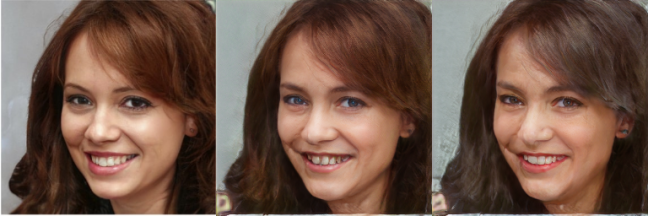

In [ ]:
#@title image you want to show
# 結果都會存在 /MLfinal_Manipulation/base/results/inversion/test
# 第二產生的結果檔名叫做*_inv_inv.png
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
original_image= "results/inversion/test/girl_ori.png" #@param {type:"string"}
first_inverst= "results/inversion/test/girl_inv.png" #@param {type:"string"}
second_inverse= "results/inversion/test/girl_inv_inv.png" #@param {type:"string"}
original = cv2.imread(original_image)
inversion = cv2.imread(first_inverst)
manipulation = cv2.imread(second_inverse)
inversion = cv2.resize(inversion, (216, 216), interpolation=cv2.INTER_AREA)
original = cv2.resize(original, (216, 216), interpolation=cv2.INTER_AREA)
manipulation = cv2.resize(manipulation, (216, 216), interpolation=cv2.INTER_AREA)
result = np.hstack([original, inversion, manipulation])
cv2_imshow(result)